# ANÁLISE DE VENDA DE VEÍCULOS
---
#### Considere a seguinte situação:

 * Uma agência de venda de veículos pretende estimar se um determinado veículo será vendido ou não com base em 3 características: - Preço, - Quilometragem, - Ano de Fabricação.

Os dados para treino e testes do modelo encontram-se no arquivo CSV: car-prices.csv

| mileage_per_year | model_year | price | sold |
| --- | --- | --- | --- |
| 21801 | 2000 | 30941.02 | yes |

 * mileage_per_year: indica a quantidade de milhas que o carro rodou por ano desde sua fabricação.
 * model_year: indica o ano de fabricação.
 * price: indica o preço.
 * sold: Indica se o carro foi vendido ou não (yes / no).

---

#### Objetivos

- Pré-processamento dos dados:
   - Renomear para português as colunas
   - Mapear a coluna sold transformando o yes e no em 1 e 0
   - Em vez de armazenar o ano do modelo (model_year), crie uma nova tabela e armazene a idade do veículo
   - Em vez de milhas por ano (mileage_per_year), crie uma nova tabela e armazene a quilometragem (milhas por ano * 1.60934 * idade do modelo)
   - Deixe o dataframe apenas com (quilometragem, idade, preço, vendido)
- Gráficos:
   - Explorar as bibliotecas gráficas do seaborn, matplot e plotly para criação de gráfico de 3 dimensões para vizualizar o modelo
- Inteligência Artificial:
   - Crie uma IA para prever vendas (pode ser a de árvore de decisão)

---
### Pré-processamento dos dados

In [32]:
#Instalando pandas se necessário
%pip install pandas

In [33]:
#Importando o pandas
import pandas as pd

In [34]:
#importando o dataframe

from IPython.display import display, HTML

df = pd.read_csv('car-prices.csv')

display(df) #dados resumidos
# print(df.info()) #informações dos dados
# display(HTML(df.to_html())) #dados completos

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,no
9996,9996,13246,2002,107424.63,yes
9997,9997,13018,2014,93856.99,no
9998,9998,10464,2011,51250.57,yes


#### Limpeza e transformação dos dados

In [35]:
#Renomeando colunas (úteis) para português
df.rename({
    'mileage_per_year':'milhas_por_ano',
    'model_year':'ano_modelo',
    'price':'preco',
    'sold':'vendido'
}, axis=1, inplace=True)

display(df)

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,no
9996,9996,13246,2002,107424.63,yes
9997,9997,13018,2014,93856.99,no
9998,9998,10464,2011,51250.57,yes


In [36]:
#Trocando os valores da coluna vendido de yes e no para 1 e 0

aux = {'no':0, 'yes':1}

df['vendido'] = df['vendido'].map(aux)

display(df)

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,0
9996,9996,13246,2002,107424.63,1
9997,9997,13018,2014,93856.99,0
9998,9998,10464,2011,51250.57,1


In [37]:
#Criando a tabela idade_veiculo

#pegando data atual
import datetime

ano = datetime.datetime.now().year

df['idade_veiculo'] = ano - df['ano_modelo']

display(df)

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido,idade_veiculo
0,0,21801,2000,30941.02,1,23
1,1,7843,1998,40557.96,1,25
2,2,7109,2006,89627.50,0,17
3,3,26823,2015,95276.14,0,8
4,4,7935,2014,117384.68,1,9
...,...,...,...,...,...,...
9995,9995,15572,2006,97112.86,0,17
9996,9996,13246,2002,107424.63,1,21
9997,9997,13018,2014,93856.99,0,9
9998,9998,10464,2011,51250.57,1,12


In [38]:
#Criando a tabela quilometragem

df['quilometragem'] = df['milhas_por_ano'] * 1.60934 * df['idade_veiculo']

display(df)

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido,idade_veiculo,quilometragem
0,0,21801,2000,30941.02,1,23,806960.09082
1,1,7843,1998,40557.96,1,25,315551.34050
2,2,7109,2006,89627.50,0,17,194493.56702
3,3,26823,2015,95276.14,0,8,345338.61456
4,4,7935,2014,117384.68,1,9,114931.01610
...,...,...,...,...,...,...,...
9995,9995,15572,2006,97112.86,0,17,426030.92216
9996,9996,13246,2002,107424.63,1,21,447663.67044
9997,9997,13018,2014,93856.99,0,9,188553.49308
9998,9998,10464,2011,51250.57,1,12,202081.60512


In [39]:
#Excluindo coluanas indesejadas

df.drop(columns=['Unnamed: 0', 'milhas_por_ano', 'ano_modelo'], axis=1, inplace=True)

display(df)

,preco,vendido,idade_veiculo,quilometragem
0,30941.02,1,23,806960.09082
1,40557.96,1,25,315551.34050
2,89627.50,0,17,194493.56702
3,95276.14,0,8,345338.61456
4,117384.68,1,9,114931.01610
...,...,...,...,...
9995,97112.86,0,17,426030.92216
9996,107424.63,1,21,447663.67044
9997,93856.99,0,9,188553.49308
9998,51250.57,1,12,202081.60512


In [206]:
#Organizando disposição das colunas para quilometragem, idade, preço, vendido

df = df[['quilometragem', 'idade_veiculo', 'preco', 'vendido']]

display(df)

,quilometragem,idade_veiculo,preco,vendido
0,806960.09082,23,30941.02,1
1,315551.34050,25,40557.96,1
2,194493.56702,17,89627.50,0
3,345338.61456,8,95276.14,0
4,114931.01610,9,117384.68,1
...,...,...,...,...
9995,426030.92216,17,97112.86,0
9996,447663.67044,21,107424.63,1
9997,188553.49308,9,93856.99,0
9998,202081.60512,12,51250.57,1


### Gráficos

#### Seaborn & Matplotlib

In [41]:
#instalando seaborn e matplotlib se necessario
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [42]:
#importando seaborn e matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

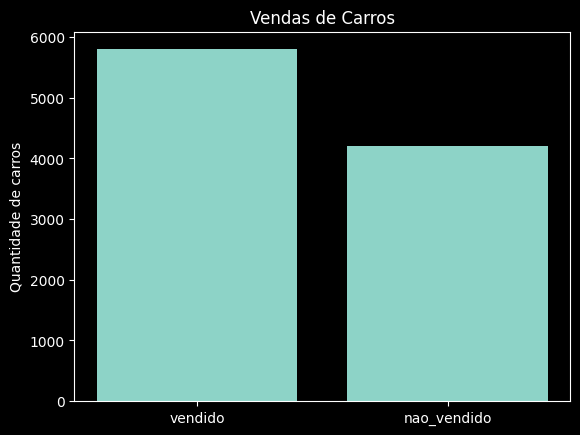

In [43]:
#Gráfico de quantidade de veículos vendidos

vendido = len(df[df['vendido']==1])
nao_vendido = len(df[df['vendido']==0])

plt.bar(['vendido', 'nao_vendido'], [vendido, nao_vendido])

plt.ylabel('Quantidade de carros')
plt.title('Vendas de Carros')	

plt.show()


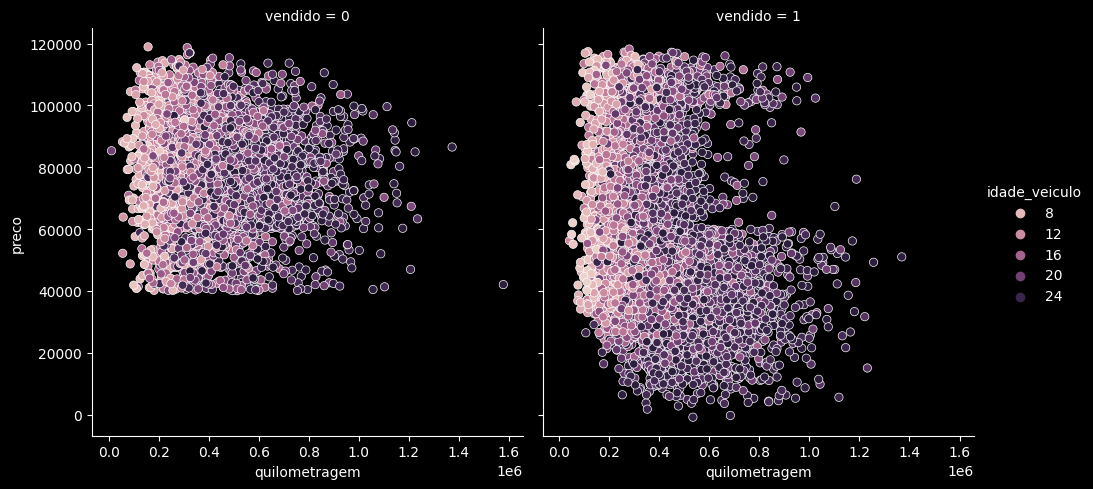

In [44]:
#Grafico de 3 dimenções:
import matplotlib.ticker as ticker

ax = sns.relplot(data=df, x='quilometragem', y='preco', col='vendido', hue='idade_veiculo')


plt.show()

#### Plotly

In [45]:
#instalando Plotly se precisar

%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [46]:
#importando Plotly

import plotly.express as px

In [47]:
# Grafico de barras

columns = df.columns

for column in columns:
    fig = px.histogram(df, x=column, color='vendido', text_auto=True, 
                                labels={
                                    'vendido':'Vendidos',
                                    'quilometragem':'Quilometragem',
                                    'idade_veiculo':'Idade do veículo',
                                    'preco':'Preço'
                                }, color_discrete_sequence=['Green','Darkred'])
    
    newnames = {'0':'Não', '1': 'Sim'}
    fig.for_each_trace(lambda t: t.update(name = newnames[t.name], 
                                          legendgroup = newnames[t.name], 
                                          hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                         ))
    
    fig.update_layout(title={
    'text' : 'RELAÇÃO ENTRE CARROS VENDIDOS E NÃO VENDIDOS',
    'x' : 0.5
    })

    fig.update_layout(bargap=0.2)
    fig.show()

In [52]:
#Gráfico de pizza


fig = px.pie(df, values='vendido', names='idade_veiculo', color_discrete_sequence=px.colors.sequential.Turbo)
fig.update_layout(title={
    'text':f'RELAÇÃO DE CARROS VENDIDOS POR IDADE',
    'x':0.5
})
fig.show()

In [ ]:
#Grafico de 3 dimenções:

fig = px.scatter(df, x='quilometragem', y='preco', color='idade_veiculo', facet_col='vendido', 
                                                labels={
                                                    'quilometragem':'Quilometragem',
                                                    'preco':'Preço',
                                                    'idade_veiculo':'Idade do Veículo'
                                                },color_continuous_scale=px.colors.sequential.Turbo)

fig.update_layout(title={
    'text':'GRÁFICO DE DISPERSÃO DE TRÊS DIMENSÕES SOBRE VEÍCULOS',
    'x':0.5
})

fig.show()

### Inteligência Artificial

In [207]:
#instalando bibliotecas de IA do Python
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [208]:
#dividindo X e Y

y = df['vendido']
x = df[['quilometragem','idade_veiculo','preco']]

x = x.values

In [209]:
#Importando as IA
from sklearn.ensemble import RandomForestClassifier

In [210]:
#Dividindo a base de treino e teste
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [211]:
#Criando o modelo da IA
randomForest_model = RandomForestClassifier()

In [212]:
#Treinando a IA
randomForest_model.fit(x_train, y_train)

RandomForestClassifier()

In [213]:
#Testando a IA

predict_randomForest = randomForest_model.predict(x_test)

In [214]:
#Avaliando a precisão da IA
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, predict_randomForest)

print(f'{score:,.2%}')

75.88%


In [215]:
#Verificando as previsões da IA
from IPython.display import display, HTML

df_aux = pd.DataFrame()
df_aux['Resposta Correta'] = y_test
df_aux['Previsão IA'] = predict_randomForest

display(df_aux) #dados simplificados
# display(HTML(df_aux.to_html())) #dados completos

,Resposta Correta,Previsão IA
929,1,1
6274,1,1
3184,0,0
2274,0,1
166,0,0
...,...,...
4230,1,0
3294,0,0
6514,0,1
2972,1,1


In [216]:
#Efetuando previsões para o usuário

#['quilometragem','idade_veiculo','preco']

quilometragem = float(input('Enrte com a quilometragem do seu carro(Km): '))
idade_veiculo = int(input('Entre com a idade do seu veículo: '))
preco = float(input('Por quanto gostaria de vender seu carro? R$'))

predict = randomForest_model.predict([[quilometragem,idade_veiculo,preco]])



predict = 'SERÁ' if predict == [0] else 'NÃO SERÁ'

print("Um carro com:")
print(f'Quilometragem: {quilometragem}Km')
print(f'Idade: {idade_veiculo} anos')
print(f'Preço de R${preco}')

print(f'\n Este carro {predict} vendido')
print(f'Confiabilidade da IA: {score:,.2%}')


Um carro com:
Quilometragem: 1000000.0Km
Idade: 10 anos
Preço de R$1000000.0

 Este carro NÃO SERÁ vendido
Confiabilidade da IA: 75.88%
